### libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

### load and train data

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Vectorize data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to one-hot encoding
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### defining the models

In [10]:
# Function to build model with variable layers and units
def build_model(num_layers, units_per_layer):
    model = models.Sequential()
    # Input layer
    model.add(layers.Dense(units_per_layer, activation='relu', input_shape=(10000,)))
    # Additional hidden layers
    for _ in range(num_layers - 1):
        model.add(layers.Dense(units_per_layer, activation='relu'))
    # Output layer
    model.add(layers.Dense(46, activation='softmax'))
    # Compile model
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Configurations to test
configurations = [
    {'num_layers': 1, 'units': 16},
    {'num_layers': 1, 'units': 64},
    {'num_layers': 1, 'units': 128},
    {'num_layers': 2, 'units': 16},
    {'num_layers': 2, 'units': 64},  # Baseline
    {'num_layers': 2, 'units': 128},
    {'num_layers': 3, 'units': 16},
    {'num_layers': 3, 'units': 64},
    {'num_layers': 3, 'units': 128},
]



### build and train models

In [11]:
history_dict = {}

# Train and evaluate each configuration
for config in configurations:
    print(f"\nTesting model with {config['num_layers']} layers and {config['units']} units")
    model = build_model(config['num_layers'], config['units'])

    # Split training data into training and validation sets
    x_val = x_train[:1000]
    partial_x_train = x_train[1000:]
    y_val = y_train[:1000]
    partial_y_train = y_train[1000:]

    # Train model
    history = model.fit(partial_x_train, partial_y_train,
                       epochs=20, batch_size=512,
                       validation_data=(x_val, y_val),
                       verbose=1)

    # Store history
    history_dict[f"{config['num_layers']}_layers_{config['units']}_units"] = history.history

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {test_acc:.4f}")


Testing model with 1 layers and 16 units
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.2297 - loss: 3.6063 - val_accuracy: 0.5560 - val_loss: 3.0468
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5970 - loss: 2.8597 - val_accuracy: 0.6290 - val_loss: 2.4744
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6539 - loss: 2.3048 - val_accuracy: 0.6480 - val_loss: 2.0457
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6798 - loss: 1.9045 - val_accuracy: 0.6730 - val_loss: 1.7464
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7074 - loss: 1.6197 - val_accuracy: 0.6920 - val_loss: 1.5413
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7396 - loss: 1.3912 - val_accuracy: 0.7130 - val_loss: 1.3966
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7529 - loss: 1.2398 - val_accuracy: 0.7230 - val_loss: 1.2944
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7733

### results

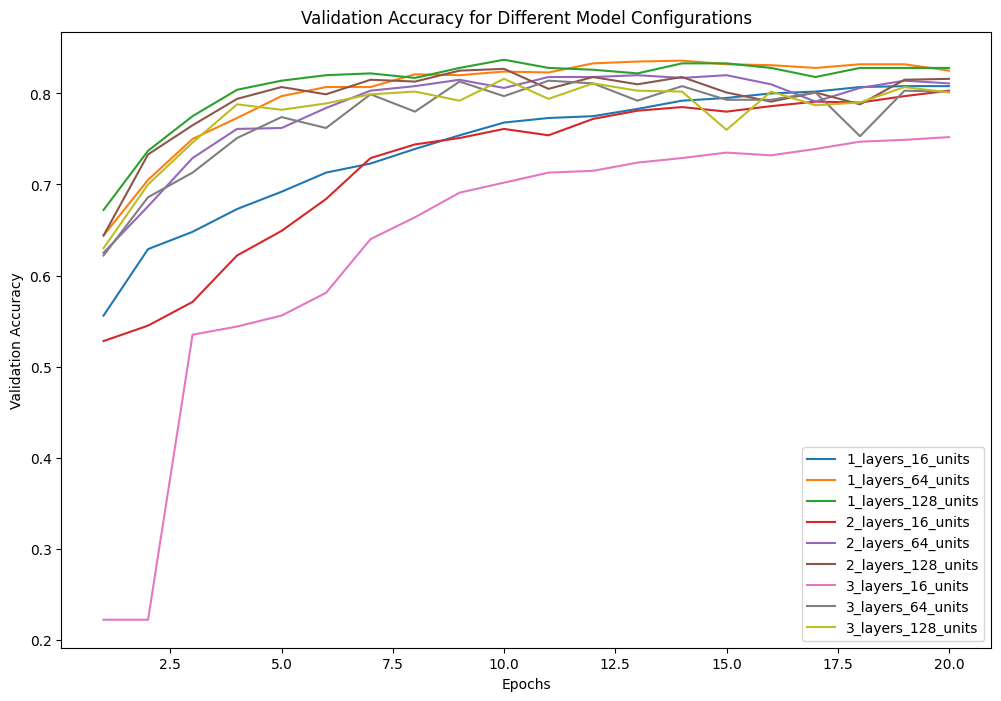

In [12]:
plt.figure(figsize=(12, 8))
for config_name, history in history_dict.items():
    val_acc = history['val_accuracy']
    plt.plot(range(1, len(val_acc) + 1), val_acc, label=config_name)
plt.title('Validation Accuracy for Different Model Configurations')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()